In [2]:
import numpy as np # importing this for linear algebra calculations
import pandas as pd

In [3]:
real = pd.read_csv("True.csv")
fake = pd.read_csv("Fake.csv")

In [4]:
# i am reading files from current directory.......

In [5]:
real.head() # display head of realnews..

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
fake.head() #display head of fake news...

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
#As this is a supervised learning problem, we are creating a target column named ‘label’ in both real and fake news data and concatenating them. with this thing we can check if data is balanced or not.

In [15]:
real['label'] = 1
fake['label'] = 0
data = pd.concat([real, fake]) # concatinating both files into one dataset.



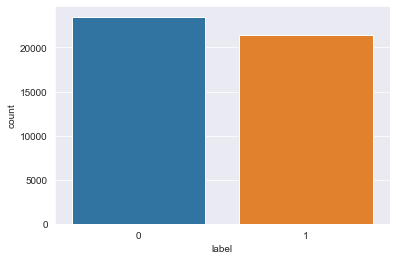

In [16]:
import seaborn as sns
sns.set_style("darkgrid")
sns.countplot(data['label']);

In [17]:
# it is seen that data is balanced.

In [18]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [19]:
# luckily there are no null values. So we dont need normalization here or anything.

In [20]:
data.columns # displaying all columns in data, from fake and real news.

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [25]:
data.count()

text     44898
label    44898
dtype: int64

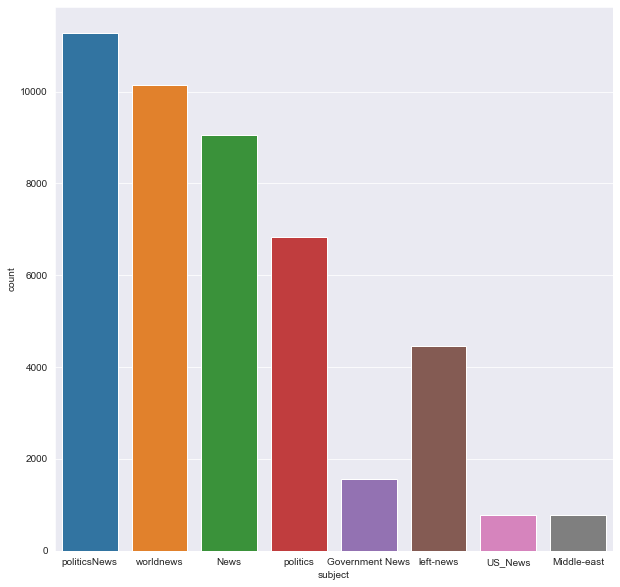

In [21]:
import matplotlib.pyplot as plt
data['subject'].value_counts()
plt.figure(figsize = (10,10))
sns.set_style("darkgrid")
sns.countplot(data['subject']);

In [24]:
#There are news about 8 subjects. We have the largest number of news from politicsNews. We can dig more into this.

[Text(0, 0, '0'), Text(0, 0, '1')]

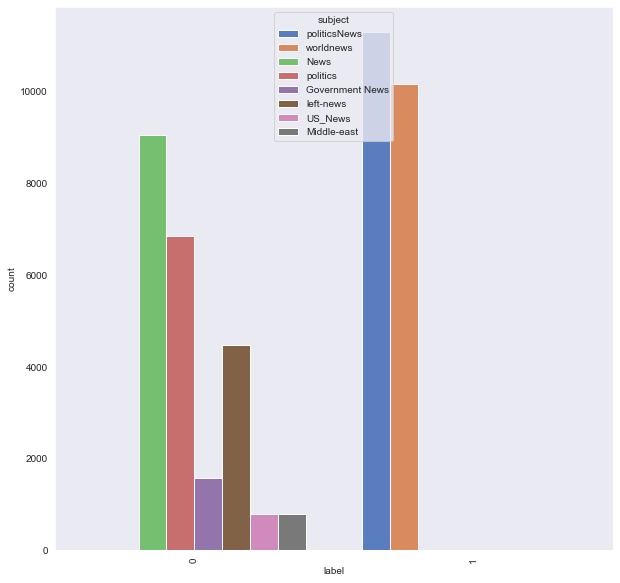

In [22]:
plt.figure(figsize = (10,10))
sns.set_style("dark")
chart = sns.countplot(x = "label", hue = "subject" , data = data , palette = 'muted')
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [23]:
data['text'] = data['title'] + " " + data['text']
data = data.drop(['title', 'subject', 'date'], axis=1)

In [26]:
#It is seen from the plot that all our real news belongs to 2 subjects.
#maybe this is because data is taken only from a small period of time.
#so now i concatenated title and text fields into one column and droped all other columns.